<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/dviz-course/blob/master/docs/m07-1D/lab07.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://yyahn.com/dviz-course/m07-1D/lab07/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/yy/dviz-course/master/docs/m07-1D/lab07.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View raw on Github</a>
  </td>
</table>

# Module 7: 1D data

Let's first import basic packages and then load a dataset from `vega_datasets` package. If you don't have `vega_datasets` or `altair` installed yet, use `pip` or `conda` to install them. 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import altair_viewer
from vega_datasets import data

ModuleNotFoundError: No module named 'altair_viewer'

In [6]:
cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## 1D scatter plot

Let's consider the `Acceleration` column as our 1D data. If we ask pandas to plot this series, it'll produce a line graph where the index becomes the horizontal axis. 

<AxesSubplot:>

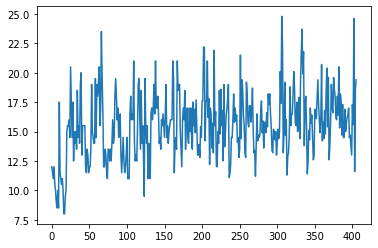

In [7]:
cars.Acceleration.plot()

Because the index is not really meaningful, drawing line between subsequent values is misleading! This is definitely not the plot we want! 

It's actually not trivial to use pandas to create an 1-D scatter plot. Instead, we can use `matploblib`'s `scatter` function. We can first create an array with zeros that we can use as the vertical coordinates of the points that we will plot.  `np.zeros_like` returns an array with zeros that matches the shape of the input array. 

In [8]:
np.zeros_like([1,2,3])

array([0, 0, 0])

**Q: now can you create an 1D scatter plot wit `matplotlib`'s scatter function?** Make the figure wide (e.g. set `figsize=(10,2)`) and then remove the y tics. 

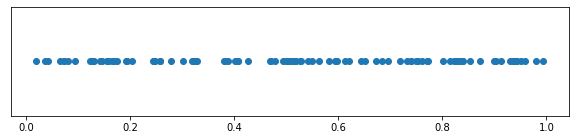

In [10]:
data = np.random.rand(100)
plt.figure(figsize=(10, 2))
plt.scatter(data, np.zeros_like(data), marker='o')
plt.yticks([])
plt.show()

As you can see, there are lots of occlusions. So this plot cannot show the distribution properly and we would like to fix it. How about adding some jitters? You can use `numpy`'s `random.rand()` function to generate random numbers, instead of using an array with zeros. 

**Q: create a jittered 1D scatter plot.**

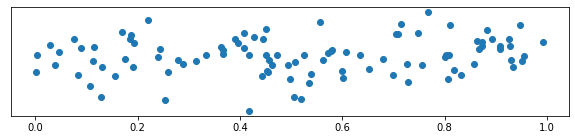

In [21]:
x = np.random.rand(100)
jittered_y = np.random.normal(0, 0.5, 100)
plt.figure(figsize=(10, 2))
plt.scatter(x, jittered_y, marker='o')
plt.yticks([])
plt.show()

We can further improve this by adding transparency to the symbols. The transparency option for `scatter` function is called `alpha`. Set it to be 0.2.

**Q: create a jittered 1D scatter plot with transparency (alpha=0.2)**

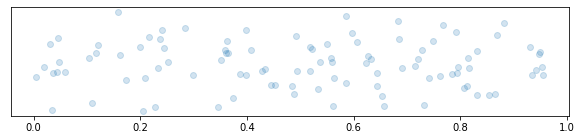

In [22]:
x = np.random.rand(100)
jittered_y = np.random.normal(0, 0.5, 100)
plt.figure(figsize=(10, 2))
plt.scatter(x, jittered_y, marker='o', alpha=0.2)
plt.yticks([])
plt.show()

Another strategy is using empty symbols. The option is `facecolors`. You can also change the stroke color (`edgecolors`). 

**Q: create a jittered 1D scatter plot with empty symbols.**

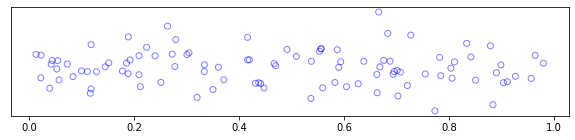

In [26]:
x = np.random.rand(100)
jittered_y = np.random.normal(0, 0.5, 100)
plt.figure(figsize=(10, 2))
plt.scatter(x, jittered_y, marker='o', alpha=0.5, facecolors='none', edgecolors='b')
plt.yticks([])
plt.show()

## What happens if you have lots and lots of points?

Whatever strategy that you use, it's almost useless if you have too many data points. Let's play with different number of data points and see how it looks. 

It not only becomes completely useless, it also take a while to draw the plot itself. 

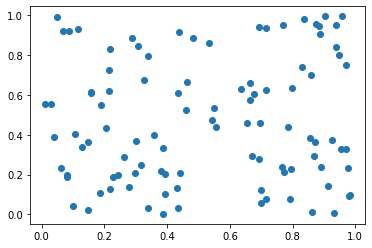

In [29]:
# TODO: play with N and see what happens. 
N = 100
x = np.random.rand(N)
jittered_y = np.random.rand(N)
plt.scatter(x, jittered_y, marker='o')
plt.show()
# YOUR SOLUTION HERE

## Histogram and boxplot

When you have lots of data points, you can't no longer use the scatter plots. Even when you don't have millions of data points, you often want to get a quick summary of the distribution rather than seeing the whole dataset. For 1-D datasets, two major approaches are histogram and boxplot. Histogram is about aggregating and counting the data while boxplot is about summarizing the data. Let's first draw some histograms. 

### Histogram

It's very easy to draw a histogram with pandas. 

<AxesSubplot:>

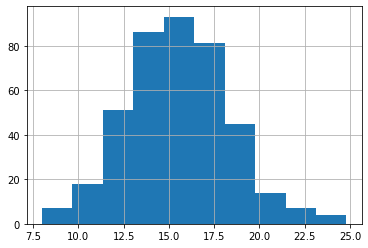

In [30]:
cars.Acceleration.hist()

You can adjust the bin size, which is the main parameter of the histogram. 

<AxesSubplot:>

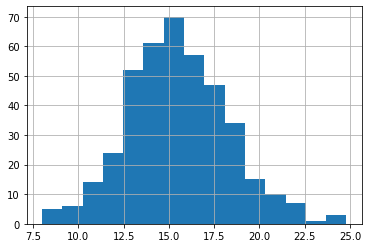

In [31]:
cars.Acceleration.hist(bins=15)

You can even specify the actual bins. 

<AxesSubplot:>

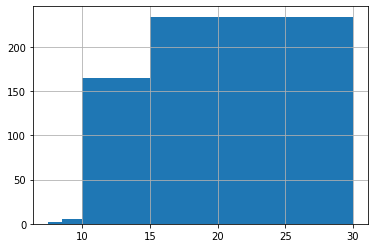

In [32]:
bins = [7.5, 8.5, 10, 15, 30]
cars.Acceleration.hist(bins=bins)

Do you see anything funky going on with this histogram? What's wrong? Can you fix it? 

**Q: Explain what's wrong with this histogram and fix it.** 

(hints: do you remember what we discussed regarding histogram? Also [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) does not show the option that you should use. You should take a look at the `matplotlib`'s documentation.  

<AxesSubplot:>

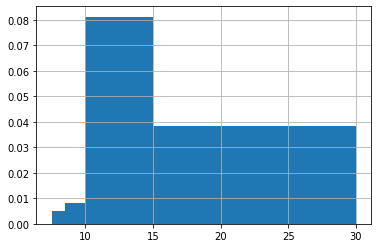

In [34]:
# failure to show density makes the first bins misleading
bins = [7.5, 8.5, 10, 15, 30]
cars.Acceleration.hist(bins=bins, density=True)

### Boxplot

Boxplot can be created with pandas very easily. Check out the `plot` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html 

**Q: create a box plot of `Acceleration`**

<AxesSubplot:>

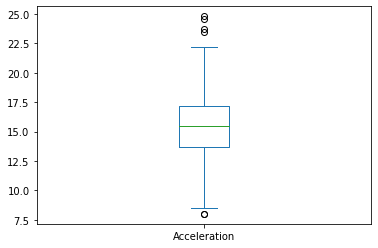

In [35]:
cars.Acceleration.plot(kind='box')

## 1D scatter plot with Seaborn and Altair

As you may have noticed, it is not very easy to use `matplotlib`. The organization of plot functions and parameters are not very systematic. Whenever you draw something, you should search how to do it, what are the parameters you can tweak, etc. You need to manually tweak a lot of things when you work with `matplotlib`. 

There are more systematic approaches towards data visualization, such as the "[Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)". This idea of *grammar* led to the famous `ggplot2` (http://ggplot2.tidyverse.org) package in R as well as the [Vega & Vega-lite](https://vega.github.io) for the web. The grammar-based approach lets you work with *tidy data* in a natural way, and also lets you approach the data visualization systematically. In other words, they are very cool. 😎

I'd like to introduce two nice Python libraries. One is called `seaborn` (https://seaborn.pydata.org), which is focused on creating complex statistical data visualizations, and the other is called `altair` (https://altair-viz.github.io/) and it is a Python library that lets you *define* a visualization and translates it into vega-lite json. 

Seaborn would be useful when you are doing exploratory data analysis; altair may be useful if you are thinking about creating and putting an interactive visualization on the web. 

If you don't have them yet, check the [installation page of altair](https://altair-viz.github.io/getting_started/installation.html). In `conda`, 

    $ conda install -c conda-forge altair vega_datasets jupyterlab 

Let's play with it. 

In [61]:
import seaborn as sns
import altair as alt

# Uncomment the following line if you are using Jupyter notebook
alt.renderers.enable('notebook')
# alt.renderers.enable('notebook')

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [53]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


### Beeswarm plots with seaborn 

Seaborn has a built-in function to create 1D scatter plots with multiple categories. 

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

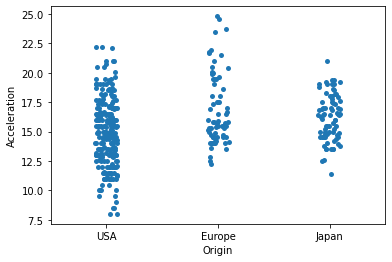

In [54]:
sns.stripplot(x='Origin', y='Acceleration', data=cars)

And you can easily add jitters or even create a beeswarm plot. 

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

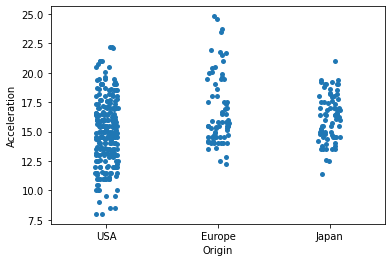

In [55]:
sns.stripplot(x='Origin', y='Acceleration', data=cars, jitter=True)

Seems like European cars tend to have good acceleration. 😎 Let's look at the beeswarm plot, which is a pretty nice option for fairly small datasets. 

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

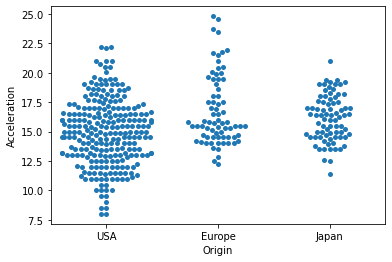

In [56]:
sns.swarmplot(x='Origin', y='Acceleration', data=cars)

Seaborn also allows you to use colors for another categorical variable. The option is `hue`.  

**Q: can you create a beeswarm plot where the swarms are grouped by `Cylinders`, y-values are `Acceleration`, and colors represent the `Origin`?**

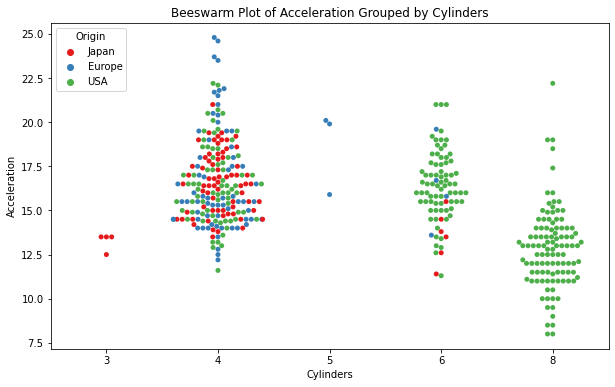

In [57]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Cylinders', y='Acceleration', hue='Origin', data=cars, palette='Set1')
plt.xlabel('Cylinders')
plt.ylabel('Acceleration')
plt.title('Beeswarm Plot of Acceleration Grouped by Cylinders')
plt.legend(title='Origin', loc='upper left')

plt.show()

And of course you can create box plots too. 

**Q: Create boxplots to show the relationships between `Cylinders` and `Acceleration`.**


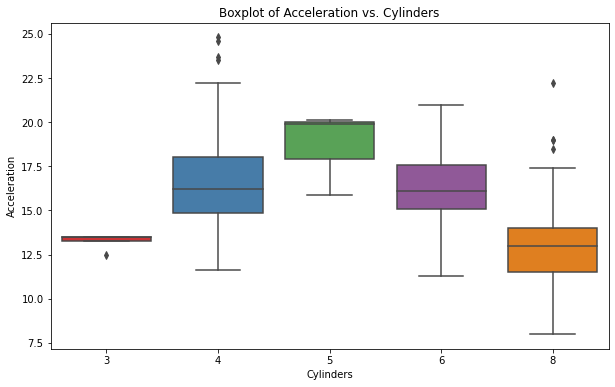

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cylinders', y='Acceleration', data=cars, palette='Set1')

plt.xlabel('Cylinders')
plt.ylabel('Acceleration')
plt.title('Boxplot of Acceleration vs. Cylinders')

plt.show()

### Altair basics

With `altair`, you're thinking in terms of a whole dataframe, rather than vectors for x or vectors for y. Passing the dataset to `Chart` creates an empty plot. If you try to run `alt.Chart(cars)`, it will complain. You need to say what's the visual encoding of the data. 

In [59]:
alt.Chart(cars)

SchemaValidationError: '{'data': {'name': 'data-f02450ab61490a1363517a0190416235'}}' is an invalid value.

'mark' is a required property

alt.Chart(...)

In [60]:

alt.Chart(cars).mark_point()

alt.Chart(...)

So you just see one *point*. But actually this is not a single point. This is every row of the dataset represented as a point at the same location. Because there is no specification about where to put the points, it simply draws everything on top of each other. Let's specify how to spread them across the horizontal axis. 

In [24]:
alt.Chart(cars).mark_point().encode(
    x='Acceleration',
)

alt.Chart(...)

There is another nice mark called `tick`:

In [25]:
alt.Chart(cars).mark_tick().encode(
    x='Acceleration',
)

alt.Chart(...)

In `altair`, histogram is not a special type of visualization, but simply a plot with bars where a variable is binned and a counting aggregation function is used. 

In [26]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Acceleration', bin=True),
    y='count()'
) 

alt.Chart(...)

**Q: can you create a 2D scatterplot with `Acceleration` and `Horsepower`? Use `Origin` for the colors.**

In [68]:
alt.Chart(data).mark_circle().encode(
    x='Acceleration:Q',
    y='Horsepower:Q',
    color='Origin:N'
).properties(
    title='Scatterplot of Acceleration vs. Horsepower'
)

/opt/homebrew/lib/python3.9/site-packages/altair/vegalite/v5/api.py:115: UserWarning: data of type <class 'numpy.ndarray'> not recognized
  warnings.warn("data of type {} not recognized".format(type(data)), stacklevel=1)


SchemaValidationError: '[0.32712826169064035, 0.5941889495577378, 0.3245038187578285, 0.5091470091291839, 0.14167507555474312, 0.581739210634298, 0.9350725192556592, 0.38333077403499105, 0.9305405793742297, 0.5053366454311196, 0.7535105280851555, 0.7699996148740849, 0.8273927113618911, 0.4947143945071556, 0.8285207275722984, 0.14603656932076614, 0.3283096504747509, 0.0661416610363913, 0.49955575711186195, 0.6213953605295165, 0.0933600061206209, 0.7322919184716147, 0.40730311996392177, 0.1550554691661965, 0.19163102467579063, 0.2572775072398146, 0.24323249405111325, 0.9806181144765848, 0.3184784791807208, 0.47848820933469505, 0.5622791926276537, 0.5150598232900296, 0.8006403492257088, 0.3225786963498425, 0.5279610731837416, 0.6947941370773356, 0.82889445665448, 0.3008023820047735, 0.5043650929888677, 0.740715991468353, 0.1657924367648429, 0.42691963603530814, 0.15628991545370896, 0.4692094215414, 0.0814717487737241, 0.8393762335702094, 0.940797612841669, 0.7185172015242701, 0.406638493125396, 0.3813136593756562, 0.8526063332529923, 0.126607164513164, 0.4716632072813556, 0.2474230882875439, 0.07324043338766073, 0.6520490025176893, 0.27888781410484786, 0.831541688598665, 0.943166026777742, 0.8730862995207403, 0.04282395242487225, 0.2034976152886444, 0.9941802866803023, 0.5184207944053716, 0.7494732179311787, 0.07212316943600816, 0.9039219474905718, 0.6834646351146324, 0.15762707363671302, 0.8996004840670849, 0.3880328831549642, 0.5499809448340219, 0.12263447586378073, 0.8142882791916077, 0.24510069374397403, 0.6441809963922329, 0.03595663748567457, 0.823146880048334, 0.19355018531187818, 0.5415794047858123, 0.1584952945346355, 0.7732479952456925, 0.59828815864924, 0.40258428728201945, 0.838011262814206, 0.2573497728410534, 0.16997298396027716, 0.7611433827789552, 0.5261000742125407, 0.019349478508386864, 0.9583350585239335, 0.1583640008188255, 0.7406057182062405, 0.13163311149153822, 0.6729208907610461, 0.9126995710336344, 0.17548222492436416, 0.9513250030067706, 0.9381395206268861, 0.6133980802581408]' is an invalid value for `data`. Valid values are of type 'object' or 'null'.

alt.Chart(...)

Because altair/vega-lite/vega are essentially drawing the chart using javascript (and D3.js), it is very easy to export it on the web. Probably the simplest way is just exporting it into an HTML file: https://altair-viz.github.io/getting_started/starting.html#publishing-your-visualization

**Save the chart to m07.html and upload it too.** 

In [28]:
# YOUR SOLUTION HERE